# Data Exploration

In this notebook we will be exploring both of our datasets:

 - **bidders** dataset, which is located in train.csv.
 - **bids** dataset, which is located in bids.csv.
 
Let's start with the shortest one: **Bidders**

## Bidders exploratory analysis

### Loading the dataset

Let's start by loading the dataset in a Pandas' dataframse.

**NOTE**: We expect all the relevant files to be located in `../data`.

In [1]:
import pandas as pd

# Change accordingly.
bidders_file_path = "../data/train.csv"

bidders_dataframe = pd.read_csv(bidders_file_path)

sample_size = 10

# Let's start by taking a small sample
bidders_dataframe.sample(n=sample_size)

,bidder_id,payment_account,address,outcome
664,9f101e80580cbff55a2307c028408a91nebzc,f2f793a2cf083c36627c022421aa0d954b71e,7c008e5dfba281d7403c5a02f3db22dchmh3o,0.0
258,245b584befa6a5b8c759491f5f3db580p2m5v,a3d2de7675556553a5f08e4c88d2c2287emi6,0f2352b1972bc44b422ca49f0dd46340nlf0v,0.0
22,d29003d7f3ec1f0e4ca9cc17e6389b4a4phcg,a0dc95936282ff8eef7ffa54f295255ctyafs,fa442b098896fe3f9aca16a6f100e597e5rky,0.0
1648,ff3ae9450581aa3de5d2326f70e39d20w8fbl,a3d2de7675556553a5f08e4c88d2c2281vlrv,c5734eca20f4a3b7920d0acad5bc059cs4680,0.0
306,3a8124eb9fd3977e43f5e0762d9a09d536rob,a3d2de7675556553a5f08e4c88d2c228igbge,a3d2de7675556553a5f08e4c88d2c228fdnbs,0.0
1194,3893d2c62d59c232112efd332bc342dap8b4j,a3d2de7675556553a5f08e4c88d2c228hhw28,14da5cd6232222e9f999374636cf0687ju21o,0.0
1794,99a3bacd3eb66c909a02b85402ac38dfskz65,a3d2de7675556553a5f08e4c88d2c228in9hc,d593c5df7f62078f7f82ee44e4e0bac268d5s,0.0
788,0a7446b63f183a4928ae762ed6cd1c4b894qz,a3d2de7675556553a5f08e4c88d2c228l2q8w,cec7849ebb5251484203d16efd34b76fuj68q,0.0
298,205c519be884c5b1c885f61c4ba8738a737qg,a3d2de7675556553a5f08e4c88d2c228o5y1h,a3d2de7675556553a5f08e4c88d2c228uzrav,0.0
517,dd1675bf26316cd4630087fb47d0ff8fsug8e,a3d2de7675556553a5f08e4c88d2c2289oht1,63ce78587e427547c60b44e54d51a4c9xlx4i,0.0


As we can see above, all the relevant fields (besides outcome) are obfuscated. 

This doesn't mean they won't be useful for our model, but surely make things a bit harder to interpret for us.

### Descriptive statistics

In [2]:
# Totals
total_bidders = len(bidders_dataframe)
number_of_human_bidders = len(bidders_dataframe[bidders_dataframe['outcome'] == 0.0])
number_of_bot_bidders = total_bidders - number_of_human_bidders

# Proportions
human_bidders_proportion = number_of_human_bidders / total_bidders
bot_bidders_proportion = number_of_bot_bidders / total_bidders

# Statistics
print("Number of total bidders: {:,}".format(total_bidders))
print("Number of human bidders: {:,}".format(number_of_human_bidders))
print("Number of bot bidders: {:,}".format(number_of_bot_bidders))
print("Proportion of human bidders: {:.2%}".format(human_bidders_proportion))
print("Proportion of bot bidders: {:.2%}".format(bot_bidders_proportion))

Number of total bidders: 2,013
Number of human bidders: 1,910
Number of bot bidders: 103
Proportion of human bidders: 94.88%
Proportion of bot bidders: 5.12%


The first thing we notice is that our dataset is highly unbalanced, where 1910 out of 2013 records represent human bidders (94.88%), whereas only a small percentage (5.12%) of the bidders were flagged as bots (103 out of 2013).

For a better understanding of this situation, let's visualize it:

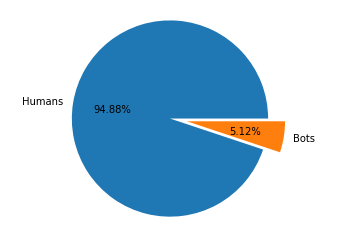

In [3]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()

# Pie chart parameters
pie_data = [number_of_human_bidders, number_of_bot_bidders]
pie_labels = ('Humans', 'Bots')
pie_labels_explode_coefficients = (0, 0.175)

# Show the chart
ax.pie(pie_data, labels=pie_labels, autopct='%1.2f%%', shadow=False, explode=pie_labels_explode_coefficients)
plt.axis('equal')
plt.show()

___

## Bids exploratory analysis

Let's now proceed to explore the **bids** dataset.

**NOTE**: We expect all the relevant files to be located in `../data`.

In [4]:
# Change accordingly.
bids_file_path = "../data/bids.csv"

bids_dataframe = pd.read_csv(bids_file_path)

sample_size = 10

# Let's start by taking a small sample
#bids_dataframe.sample(n=sample_size)
bids_dataframe.head(n=sample_size)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,9759243210526315,th,152.235.155.159,j9nl1xmo6fqhcc6
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,9759243210526315,id,3.210.112.183,hnt6hu93a3z1cpc
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,9759243210526315,th,103.64.157.225,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3


As we can see above, fields such as time, bidder_id, auction, device and url are obfuscated. 

This doesn't mean they won't be useful for our model, but surely make things a bit harder to interpret for us.

### Descriptive statistics

In [5]:
# Totals
total_bids = len(bids_dataframe)
total_auctions = len(set(bids_dataframe['auction']))
total_bidders_in_bids_dataframe = len(set(bids_dataframe['bidder_id']))
total_devices = len(set(bids_dataframe['device']))
total_countries = len(set(bids_dataframe['country']))
total_ips = len(set(bids_dataframe['ip']))
total_urls = len(set(bids_dataframe['url']))
total_merchandise_categories = len(set(bids_dataframe['merchandise']))

print("Number of bids: {:,}".format(total_bids))
print("Number of auctions: {:,}".format(total_auctions))
print("Number of total bidders in bids dataset: {:,}".format(total_bidders_in_bids_dataframe))
print("Number of devices: {:,}".format(total_devices))
print("Number of countries: {:,}".format(total_countries))
print("Number of IPs: {:,}".format(total_ips))
print("Number of URLs: {:,}".format(total_urls))
print("Number of merchandise categories: {:,}".format(total_merchandise_categories))

Number of bids: 7,656,334
Number of auctions: 15,051
Number of total bidders in bids dataset: 6,614
Number of devices: 7,351
Number of countries: 200
Number of IPs: 2,303,991
Number of URLs: 1,786,351
Number of merchandise categories: 10


As we can see, there are a vast amount of bids (7,656,334) distributed along 15,051. 

Also there are 6,614 distinct bidders in this dataset, which contrasts with the 2,013 in the training set.

These bids where made from 7,351 distinct mobile devices models, from 200 countries and from 2,303,991 different IP addresses. 

All the bids fall in one of ten categories. 

Finally, these came from 1,786,351 distinct URLS.

In [11]:
data_per_user = bids_dataframe.groupby(['bidder_id'])

def get_user_statistics_per_feature(feature_column):
    return data_per_user[feature_column].nunique()

def print_user_statistics_per_feature(feature_name, feature_per_user):
    mean_feature_per_user = feature_per_user.mean()
    median_feature_per_user = feature_per_user.median()
    mode_feature_per_user = feature_per_user.mode()
    max_feature_per_user = feature_per_user.max()
    min_feature_per_user = feature_per_user.min()
    
    print("Average number of {} per user: {}".format(feature_name, mean_feature_per_user))
    print("Median of {} per user: {}".format(feature_name, median_feature_per_user))
    print("Mode of {} per user: {}".format(feature_name, mode_feature_per_user[0]))
    print("User with more {}: {}".format(feature_name, max_feature_per_user))
    print("User with less {}: {}".format(feature_name, min_feature_per_user))
    print("-----------------------------")
    
    return feature_per_user

features_per_user = {}
for feat, column in [('auctions', 'auction'), ('bids', 'bid_id'), ('countries', 'country'), ('IPs', 'ip')]:
    features_per_user[column] = get_user_statistics_per_feature(column)
    print_user_statistics_per_feature(feat, features_per_user[column])
          
bids_per_auction_ratio_per_user = features_per_user['bid_id'] / features_per_user['auction']
average_response_time_per_user = data_per_user['time'].apply(lambda x: x.diff().mean()).fillna(0)

Average number of auctions per user: 57.807831871787116
Median of auctions per user: 10.0
Mode of auctions per user: 1
User with more auctions: 1726
User with less auctions: 1
-----------------------------
Average number of bids per user: 1157.595101300272
Median of bids per user: 18.0
Mode of bids per user: 1
User with more bids: 515033
User with less bids: 1
-----------------------------
Average number of countries per user: 12.72422134865437
Median of countries per user: 3.0
Mode of countries per user: 1
User with more countries: 178
User with less countries: 0
-----------------------------
Average number of IPs per user: 544.0963108557605
Median of IPs per user: 12.0
Mode of IPs per user: 1
User with more IPs: 111918
User with less IPs: 1
-----------------------------


One key aspect that we can notice is the huge distance between the mean and the median in the four features (auctions, bids, contries, ips) selected above. Also, the range of values for each feature is wildly spread. Take bids for instance: The highest number of bids a user made is 515,033, while the most repeated number of bids per user is 1 (also the minimum). Clearly, the highest values have a stronger influence on the mean, which is around 1157 bids per user. The fact that the value that sits at the center of the distribution of bids per user is 18 (i.e., the median) hints us about the skeweness of it. 

The same analysis applies for countries, IPs and auctions.

# Exploratory Visualization

Given our aim is to determine which information or bidding behavior is characteristic of bot users, we are going to focus on visualizing only data related to bidders.

Let's start by seeing again the distribution between bidders labeled as bots and as humans:

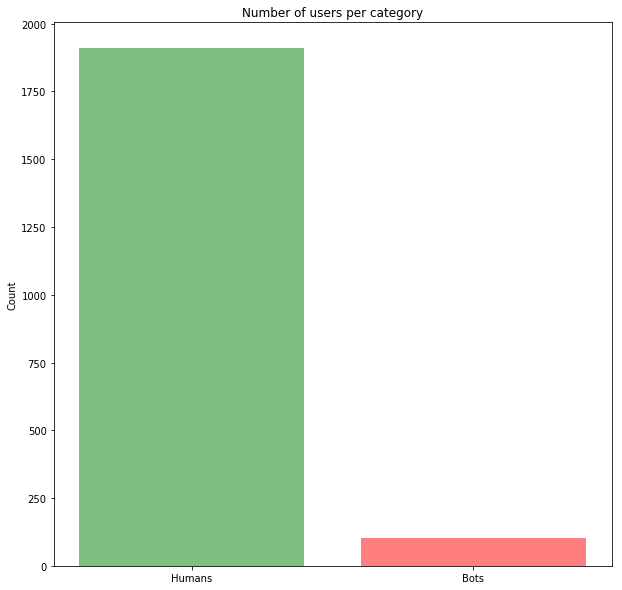

In [12]:
import numpy as np
y_pos = np.arange(len(pie_labels))
 
plt.bar(y_pos, pie_data, align='center', alpha=0.5, color=['green', 'red'])
plt.xticks(y_pos, pie_labels)
plt.ylabel('Count')
plt.title('Number of users per category')

plt.show()

Let's now visualize auctions per user:

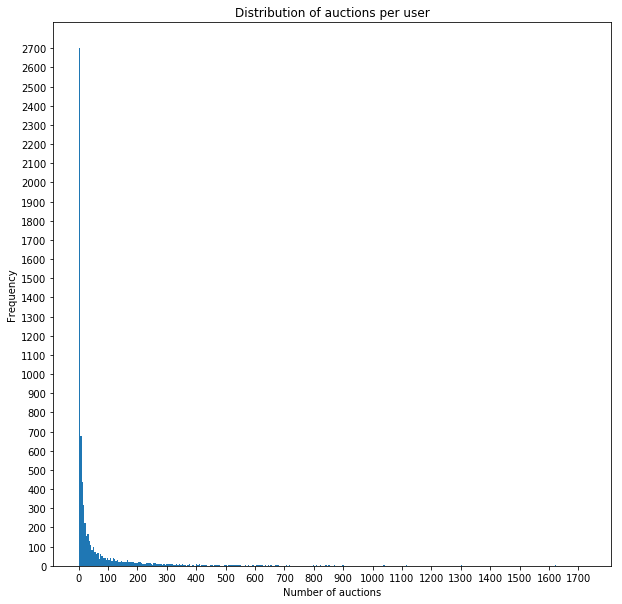

In [13]:
plt.figure(figsize=(10,10))
# Explore log=True, cumulative=True
plt.hist(features_per_user['auction'], bins='auto')
plt.yticks(range(0, 2800, 100))
plt.xticks(range(0, 1800, 100))
plt.title("Distribution of auctions per user")
plt.xlabel("Number of auctions")
plt.ylabel("Frequency")
plt.show()

The distribution of auctions per user is skewed to the left. This means that most users participate in less than 10 auctions. This is noticeable in the highest peak at the far left in the graph.

Less than 100 users participate in 100 auctions or more. As we approach to the tail of the distribution, we can notice tiny bins which are most likely comprised of less than 10 points, which means 10 or less users participate in a high number of auctions.

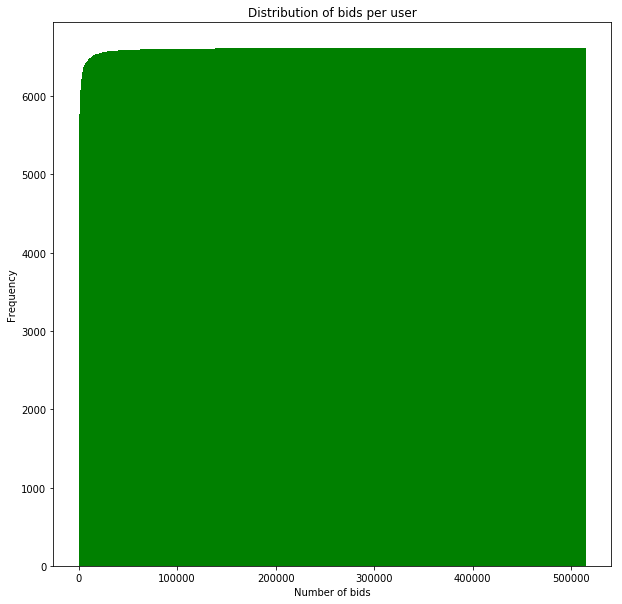

In [19]:
plt.figure(figsize=(10,10))
# Explore log=True, cumulative=True
plt.hist(features_per_user['bid_id'], bins='auto', cumulative=True, color='green')
#plt.yticks(range(0, 2800, 100))
#plt.xticks(range(0, 1800, 100))
plt.title("Distribution of bids per user")
plt.xlabel("Number of bids")
plt.ylabel("Frequency")
plt.show()

An alternative to the classic histograms, is to visualize the cumulative effect of each class in the overall distribution of data.

As we can see in the above plot, the distribution peaks or gains most of its width in the far left. This means that most of the data is comprised of users that bidded only once. This makes sense, given the fact that we know the mode (i.e., the most repeated value) is 1, and the median is 18. 

As we move to the right side of the graph, we can the slope is almost zero, which translates in a negligible contribution to the density of the distribution from the other classes (users that bidded hundreds of thousands of times).

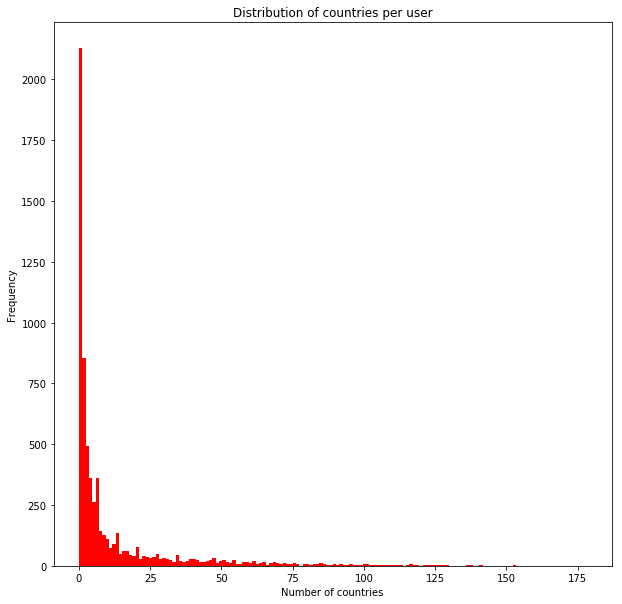

In [15]:
plt.figure(figsize=(10,10))
# Explore log=True, cumulative=True
plt.hist(features_per_user['country'], bins='auto', color='red')
#plt.yticks(range(0, 2800, 100))
#plt.xticks(range(0, 1800, 100))
plt.title("Distribution of countries per user")
plt.xlabel("Number of countries")
plt.ylabel("Frequency")
plt.show()

This graph is very similar to the histogram of auctions per user. The same pattern applies here: Most of the data is located at the left side of the graph, which means that most users bidded from less than two countries. Then, we have a skewed distribution to the right.

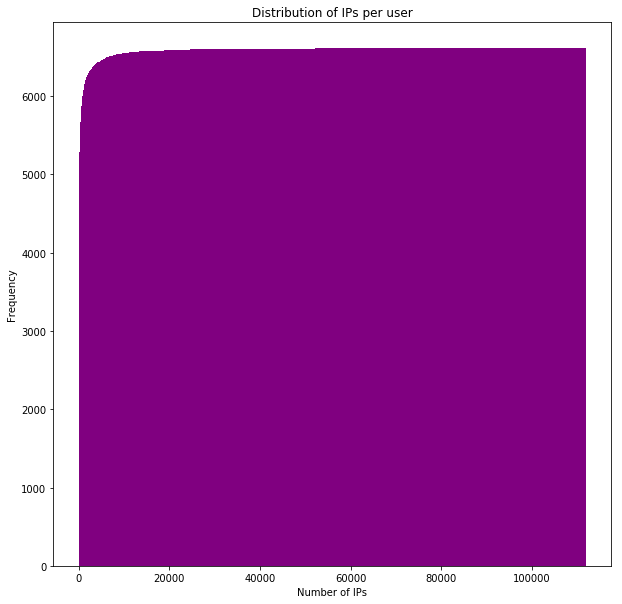

In [16]:
plt.figure(figsize=(10,10))
# Explore log=True, cumulative=True
#plt.plot(sorted(ips_per_user.values, reverse=True))
plt.hist(features_per_user['ip'], bins='auto', color='purple', cumulative=True)
#plt.yticks(range(0, 2800, 100))
#plt.xticks(range(0, 1800, 100))
plt.title("Distribution of IPs per user")
plt.xlabel("Number of IPs")
plt.ylabel("Frequency")
plt.show()

This graph is very similar to the cumulative histogram of bids per user. The same pattern applies here: Most of the data is located at the left side of the graph, which means that most users bidded from less than a couple of different IP addresses. 

Yet again, the contribution of users with thousands of distinct bidding IPs is negligible.

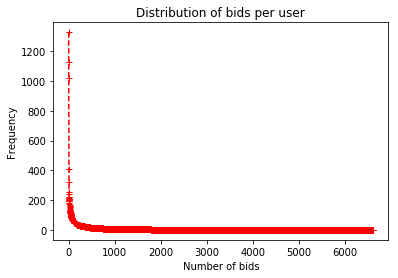

In [17]:
# Explore log=True, cumulative=True
plt.plot(sorted(bids_per_auction_ratio_per_user.values, reverse=True), 'r+--')
#plt.yticks(range(0, 2800, 100))
#plt.xticks(range(0, 1800, 100))
plt.title("Distribution of bids per user")
plt.xlabel("Number of bids")
plt.ylabel("Frequency")
plt.show()